# Seaborn

### Importation des données et nettoyage

In [2]:
import pandas as pd 

donnees = pd.read_csv("jeux_de_donnees/120-years-of-olympic-history-athletes-and-results.csv", index_col=[1])

# Création du nouveau dataset sans les lignes contenant les valeurs manquantes
donnees["Medal"] = donnees["Medal"].fillna("None")
donnees_NaN_supprimees = donnees.dropna()
donnees_NaN_supprimees = donnees_NaN_supprimees.drop_duplicates()

# Création du nouveau dataset avec remplacement des variables par la moyenne
moyennes = donnees[["Age", "Height", "Weight"]].mean()
donnees[["Age", "Height", "Weight"]] = donnees[["Age", "Height", "Weight"]].fillna(moyennes)
donnees_NaN_remplacees = donnees.drop_duplicates()

print(donnees_NaN_remplacees.shape)
print(donnees_NaN_supprimees.shape)

(269731, 14)
(206152, 14)


## 1. 

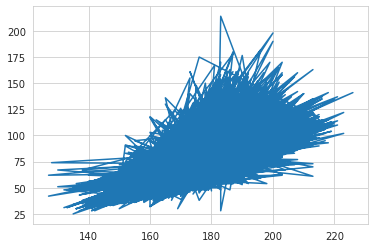

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

# set_style() de seaborn, qui permet de définir le thème de la figure à utiliser
# Il existe d'autres thèmes : whitegrid, dark, white, ticks qui ressemble bcp au thème

sns.set_style("whitegrid")
plt.figure()
plt.subplot(111)
plt.plot(donnees_NaN_supprimees["Height"], donnees_NaN_supprimees["Weight"])

plt.show()
plt.close()

### 1.2 Supprimer les axes

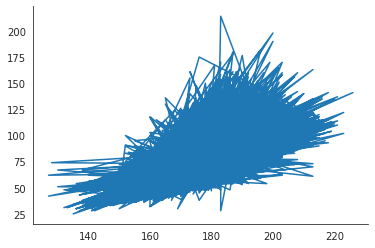

In [7]:
sns.set_style("white")

plt.figure()
plt.subplot(111)
plt.plot(donnees_NaN_supprimees["Height"], donnees_NaN_supprimees["Weight"])

# .despine permet de supprimer les axes de haut et de droite
# top=True, right=True, left=False, bottom=False

sns.despine()

plt.show()
plt.close()

## 1.3 Paramétrer les contextes avec Seaborn
Permet d'adapter la taille des courbdes et des axes en fonction du support sur lequel la figure sera placée. On peut les configurer.

Il est possible de dire à Seaborn dans quel contexte les images seront utilisées et, en fonction de ce contexte, elle adaptera la taille des courbes et des axes.

Il existe quatre contextes disponibles avec Seaborn : paper, notebook, talk et poster. paper représente le contexte le plus petit, par exemple pour créer une figure pour une publication scientifique. poster représente le contexte le plus grand, par exemple pour créer une figure à mettre sur un poster scientifique pour présenter ses résultats. notebook est utilisée pour une figure à intégrer dans un notebook, et enfin, talk permet de dire à Seaborn que la figure sera placée dans un fichier PowerPoint pour une présentation orale de ses résultats.

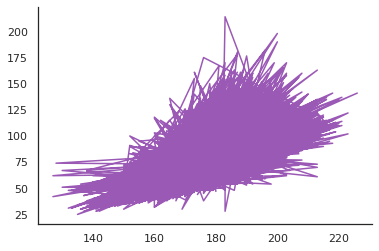

In [40]:
sns.set_style("white")

plt.figure()
plt.subplot(111)
plt.plot(donnees_NaN_supprimees["Height"], donnees_NaN_supprimees["Weight"])

# .despine permet de supprimer les axes de haut et de droite
# top=True, right=True, left=False, bottom=False

sns.despine()

# paper, notebook, talk et poser
sns.set_context("notebook")
plt.show()
plt.close()

In [11]:
sns.set_context("notebook")
sns.plotting_context()

{'font.size': 12.0,
 'axes.labelsize': 12.0,
 'axes.titlesize': 12.0,
 'xtick.labelsize': 11.0,
 'ytick.labelsize': 11.0,
 'legend.fontsize': 11.0,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0,
 'legend.title_fontsize': 12.0}

In [38]:
sns.set_context("notebook", rc={"xtick.labelsize": 11})
# On peut changer les valeurs du dictionnaire pour mettre nos paramètres

## 1.4 Les palettes de couleur avec Seaborn

### 1.4.1 Choisir une palette existante

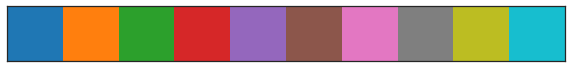

In [21]:
sns.palplot(sns.color_palette())

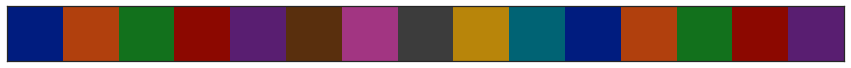

In [22]:
sns.palplot(sns.color_palette("dark", 15))

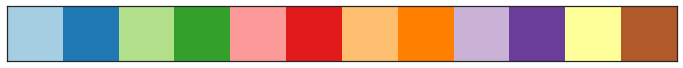

In [23]:
sns.palplot(sns.color_palette("Paired"))

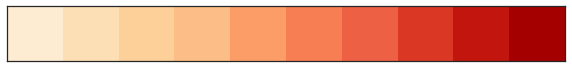

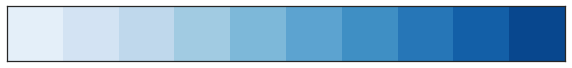

In [24]:
sns.palplot(sns.color_palette("OrRd", 10))
sns.palplot(sns.color_palette("Blues", 10))

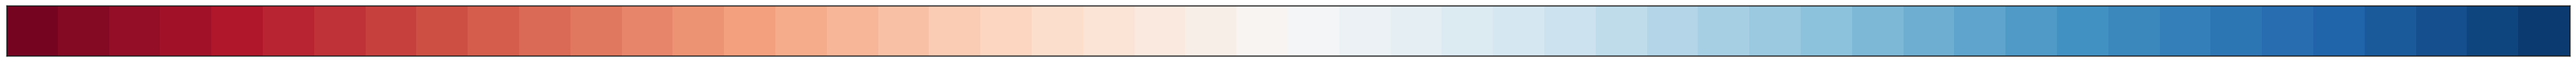

In [33]:
sns.palplot(sns.color_palette("RdBu", 50))

### 1.4.2 Créer sa propre palette de couleurs

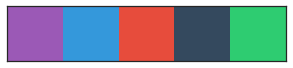

In [34]:
palette= sns.color_palette(["#9b59b6","#3498db","#e74c3c","#34495e","#2ecc71"])
sns.set_palette(palette)
sns.palplot(palette)

# 2. Les différents types de graphiques
## 2.1. Nuage de points ( scatterplot )

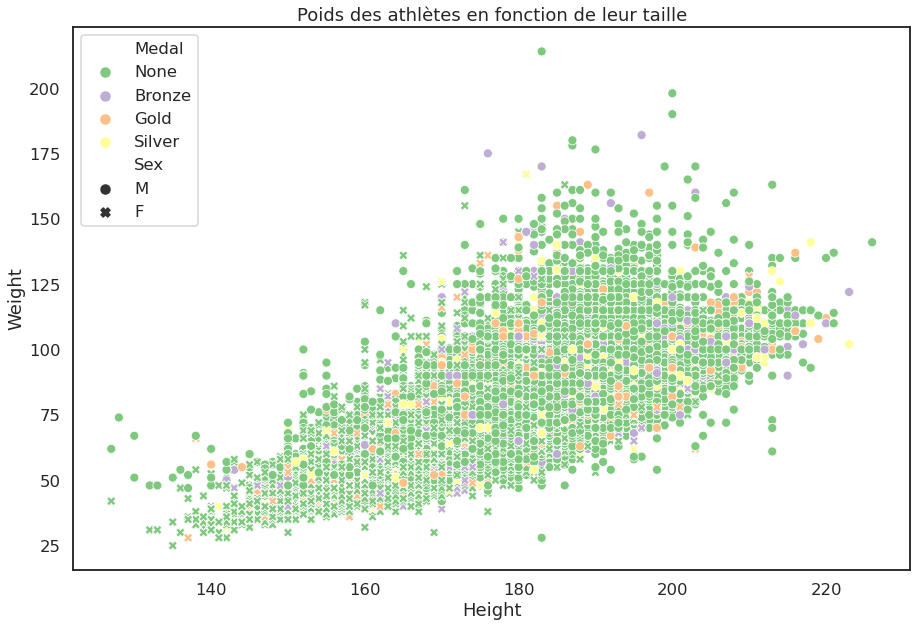

In [48]:
palette = sns.color_palette("Accent")
sns.set_palette(palette)
sns.set_style("white")
sns.set_context("talk")

plt.figure(figsize=(15,10))
plt.subplot(111)
sns.scatterplot(data=donnees_NaN_supprimees, x="Height", y="Weight", hue="Medal",style="Sex")

plt.title("Poids des athlètes en fonction de leur taille")
plt.legend(loc="upper left")

plt.show()
plt.close()

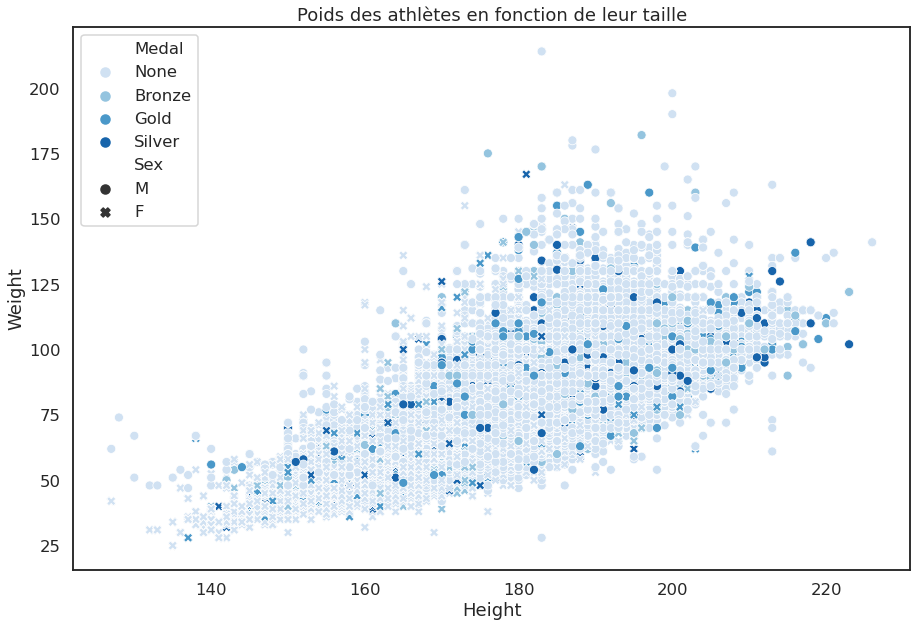

In [50]:
sns.set_style("white")
sns.set_context("talk")

plt.figure(figsize=(15,10))
plt.subplot(111)
sns.scatterplot(data=donnees_NaN_supprimees, x="Height", y="Weight", hue="Medal",style="Sex",palette="Blues")

plt.title("Poids des athlètes en fonction de leur taille")
plt.legend(loc="upper left")

plt.show()
plt.close()

## 2.3. Graphique et régression
Les deux regplot() et lmplot() fonctions vont permettre de tracer la courbe de régression entre deux variables quantitatives et donc d’étudier leur relation linéaire. La différence entre regplot() et lmplot() est que regplot() est de plus bas niveau, et donc plus personnalisable. Par exemple, la fonction regplot() accepte différents types d’objets en x et y, tels une liste, une série, ou encore un ndarray. En revanche, lmplot() attend obligatoirement en entrée un dataframe avec l’option data, et x et y seront des variables de ce dataframe.

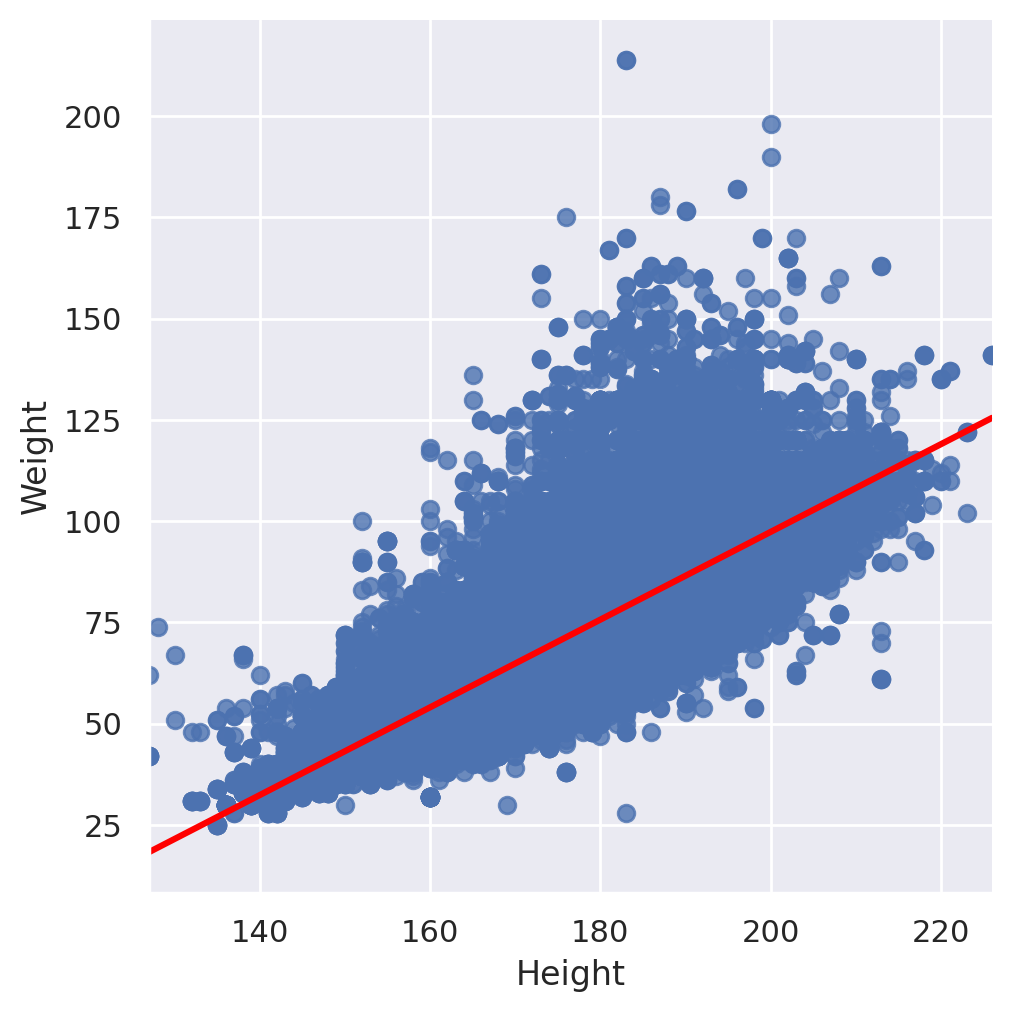

In [53]:
sns.set_style("white")
sns.set_context("talk")

sns.set(rc={"figure.dpi":200})
sns.lmplot(data=donnees_NaN_supprimees, x="Height", y="Weight", line_kws={"color":"red"})

plt.show()
plt.close()

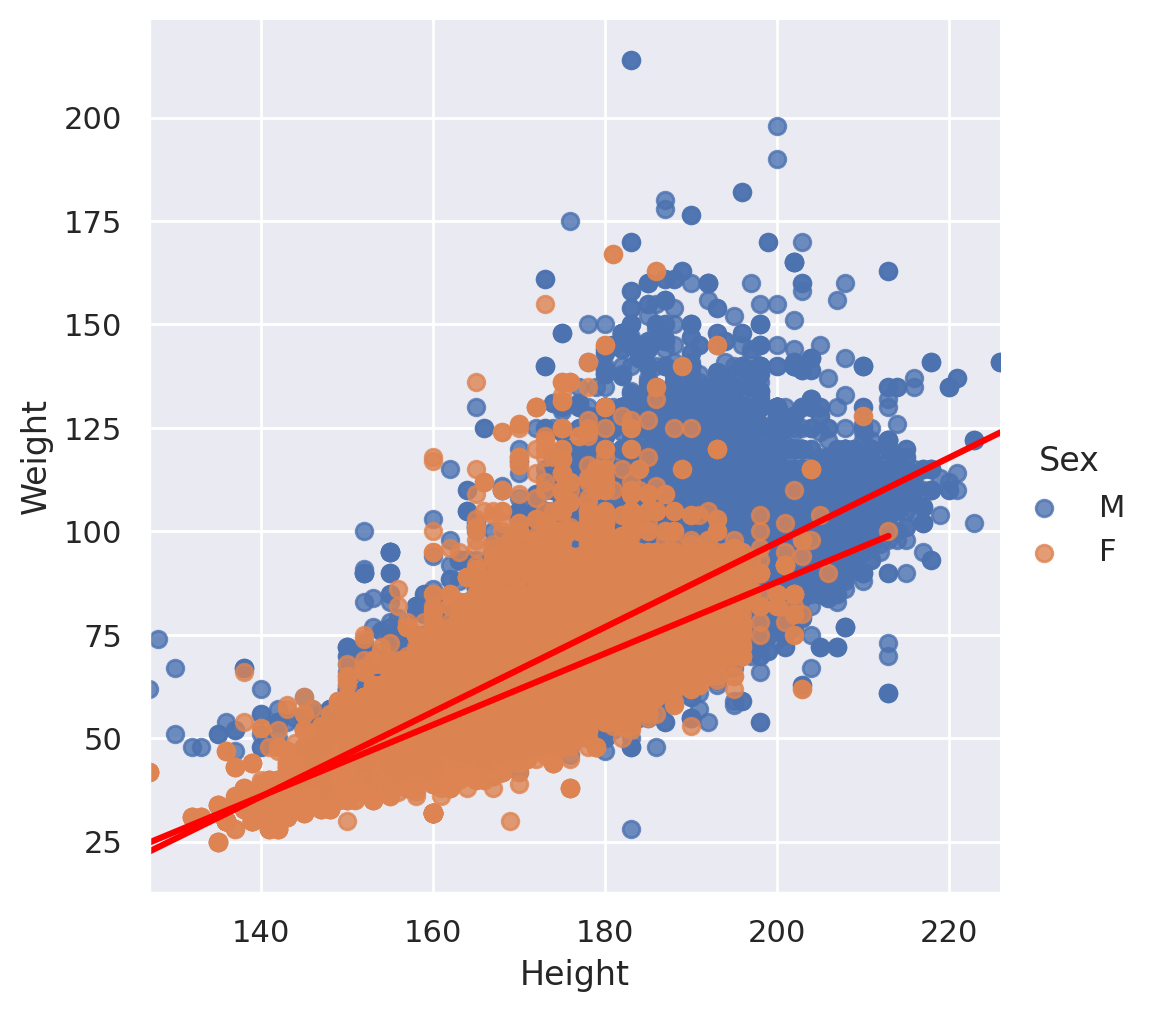

In [56]:
sns.set_style("white")
sns.set_context("talk")

sns.set(rc={"figure.dpi":200})
sns.lmplot(data=donnees_NaN_supprimees, x="Height", y="Weight", hue="Sex", line_kws={"color":"red"})

plt.show()
plt.close()

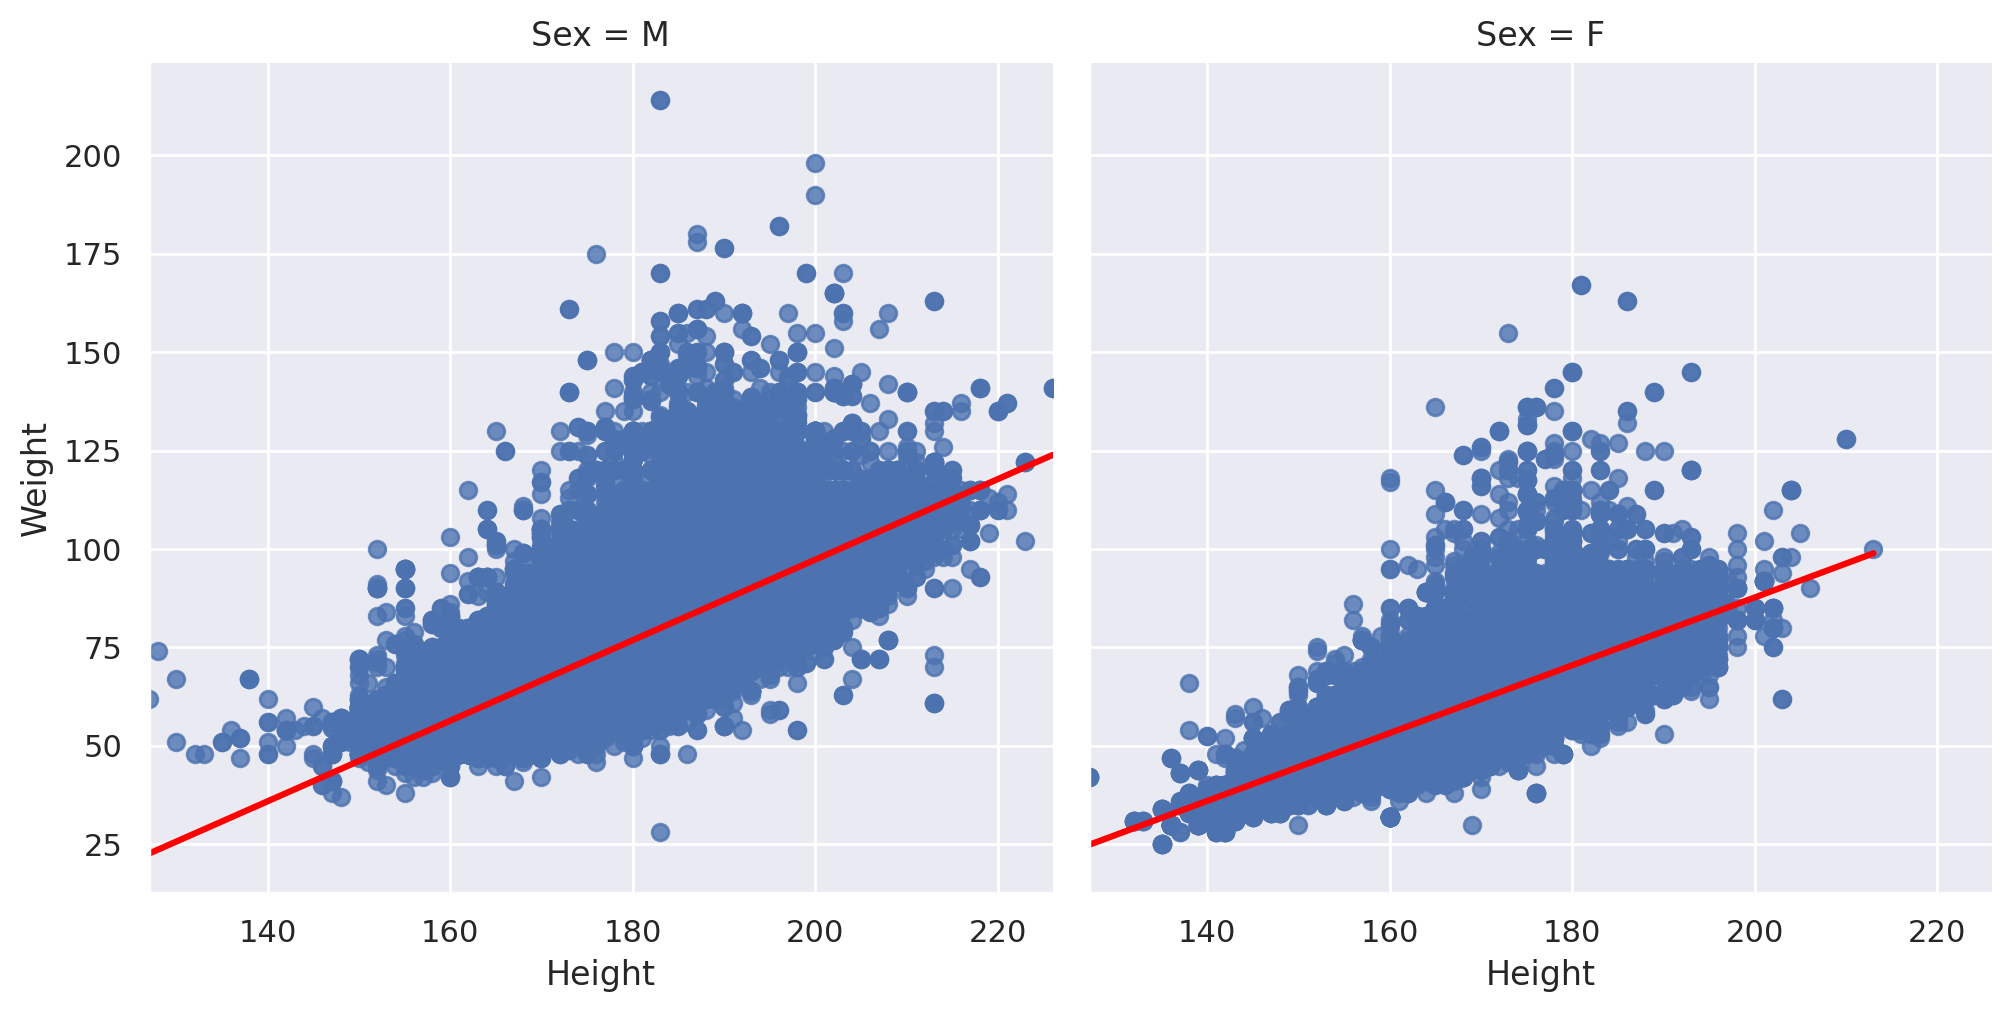

In [57]:
sns.set_style("white")
sns.set_context("talk")

sns.set(rc={"figure.dpi":200})
sns.lmplot(data=donnees_NaN_supprimees, x="Height", y="Weight", col="Sex", line_kws={"color":"red"})

plt.show()
plt.close()

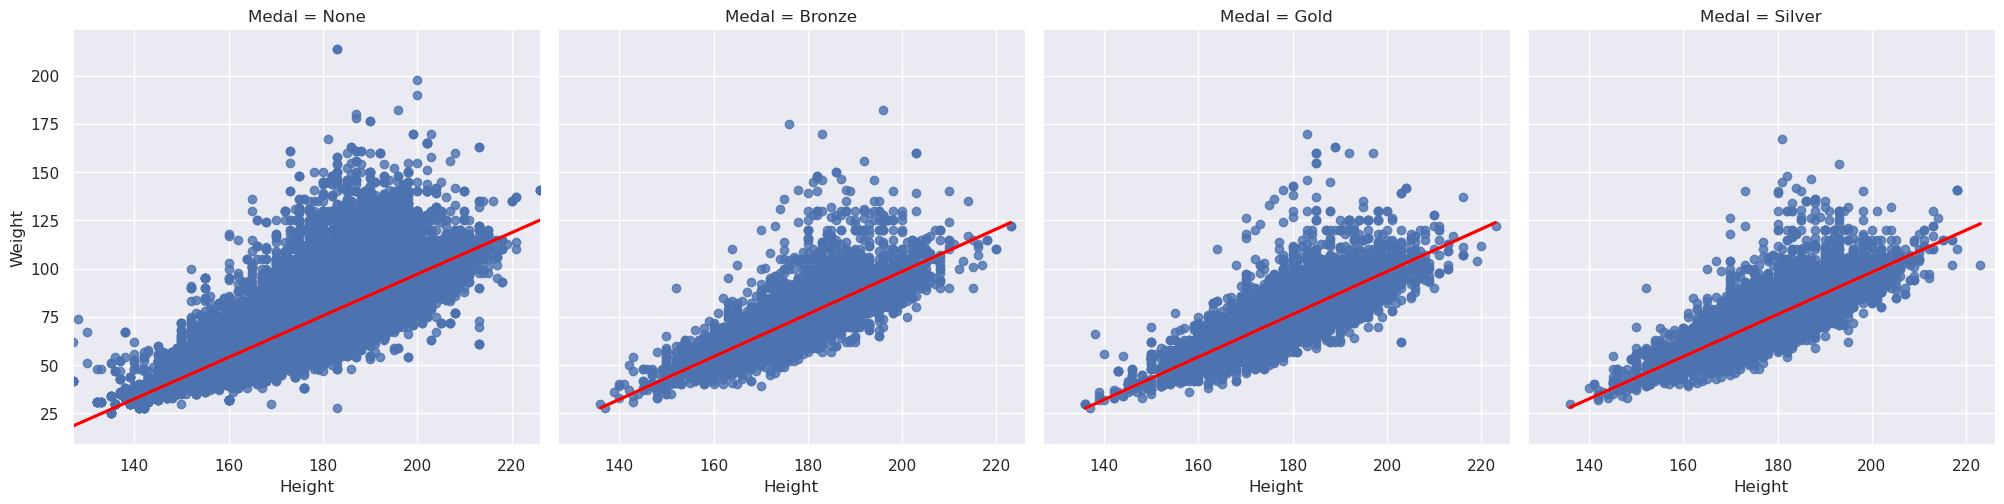

In [59]:
sns.set_style("white")
sns.set_context("talk")

sns.set(rc={"figure.dpi":100})
sns.lmplot(data=donnees_NaN_supprimees, x="Height", y="Weight", col="Medal", line_kws={"color":"red"})

plt.show()
plt.close()

## 2.4. Point plot

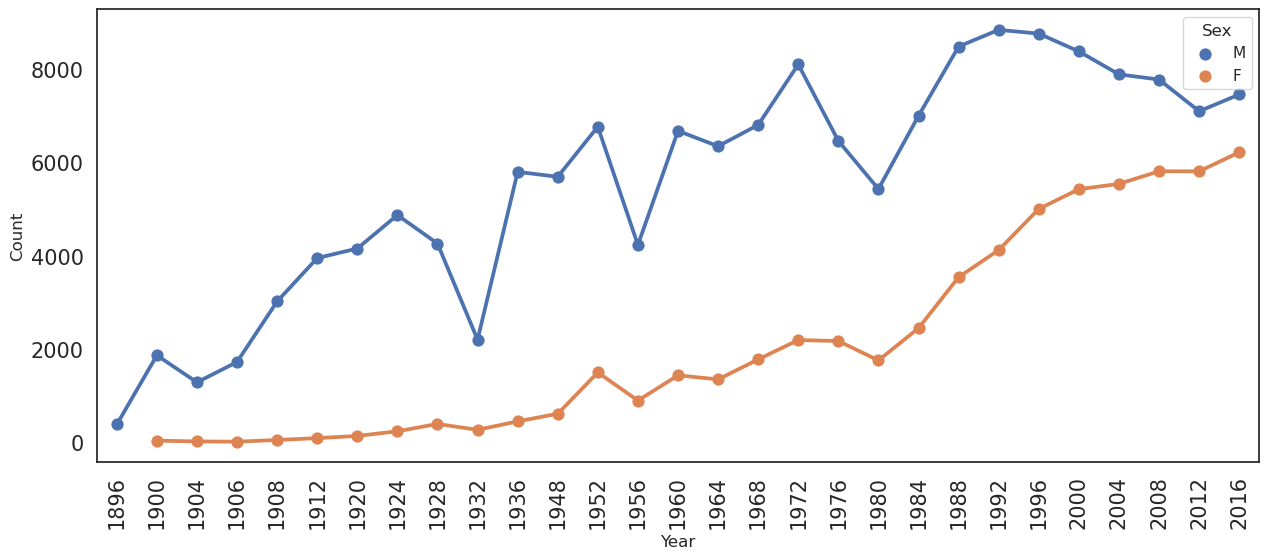

In [62]:
sns.set_style("white")
sns.set_context("notebook", rc={"xtick.labelsize":15, "ytick.labelsize":15})

plt.figure(figsize=(15,6))
plt.subplot(111)

donnees_summer = donnees_NaN_remplacees[donnees_NaN_remplacees["Season"]=="Summer"]
donnees_pointplot = donnees_summer.groupby(["Year","Sex"]).size().reset_index(name="Count")

sns.pointplot(data=donnees_pointplot, x="Year", y="Count", hue="Sex")
plt.xticks(rotation=90)
plt.show()

On constate que le nombre d’athlètes masculins a toujours été supérieur au nombre d’athlètes féminins, mais que depuis 2012, cette différence est beaucoup moins marquée. Ensuite, on constate chez les athlètes masculins trois années avec une très forte baisse de participation : 1932, 1956 et 1980. Par exemple, en cherchant un peu sur Google, l’année 1932 correspond à la Grande Dépression et les nations européennes ont eu du mal à financer les voyages des athlètes aux États-Unis, où se déroulaient les JO, d’où la forte baisse de participation. En 1956 et 1980, suite à des contextes politiques très lourds, plusieurs pays ont boycotté les JO. De plus, si vous regardez bien les dates, vous constaterez que les JO sont bien séparés de quatre années, sauf entre 1912-1920 et 1936-1948, qui correspondent respectivement à la Première puis à la Deuxième Guerre mondiale, durant lesquelles les JO n’ont pas eu lieu.
